In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


p, q, r, s, beta, w1, w2, e = 2.0*10**-4, 1.0* 10**-3, 2.0* 10**-5, 9.7* 10**-5, 5.0, 0.83, 0.88, 5 * 10**-7

dt = 1
T = 30000
t_step = int(T/dt)
t = np.linspace(0, T, t_step)
x0= [.11,.3,.1175,.11,.3,.1175]

## Bi-Directional Coupling

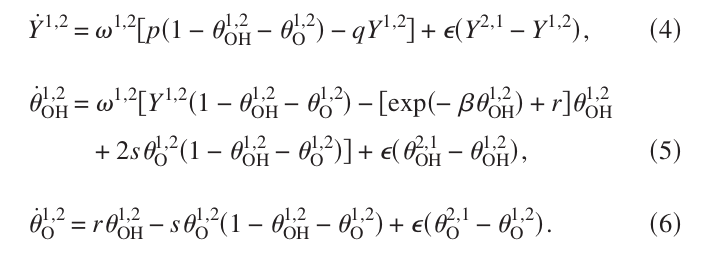

In [2]:
def solve_plot(f):
    solution = solve_ivp(
        fun=lambda t, x: f(t, x),
        t_span=(0,T), 
        y0=x0,            
        method="RK45",  
        t_eval=np.linspace(0, T, t_step)
    )
    
    X = solution.y.T
    
    plt.figure(figsize=(16, 6))
    
    plt.subplot(121)
    plt.plot(t, X[:, 1], label="OH1")
    plt.plot(t, X[:, 4], label="OH2")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Time Series")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(X[:, 1], X[:, 4], label="OH1 vs OH2")
    plt.xlabel("OH1")
    plt.ylabel("OH2")
    plt.title("Phase Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    return

def bi_coupling(t,x):
    dx = np.zeros(6)
    dx[0] = w1 * (p * (1 - x[1] - x[2]) - q * x[0]) + e * (x[3] - x[0])
    dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
    dx[2] = r * x[1] - s * x[2] * (1 - x[1] - x[2]) + e * (x[5] - x[2])
    dx[3] = w2 * (p * (1 - x[4] - x[5]) - q * x[3]) + e * (x[0] - x[3])
    dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
    dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
    
    return np.array(dx)


/tmp/ipykernel_28324/452447867.py:39: RuntimeWarning: overflow encountered in exp
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_28324/452447867.py:36: RuntimeWarning: overflow encountered in exp
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
/tmp/ipykernel_28324/452447867.py:39: RuntimeWarning: invalid value encountered in scalar add
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_28324/452447867.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
/tmp/ipykernel_28324/452447867.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  +

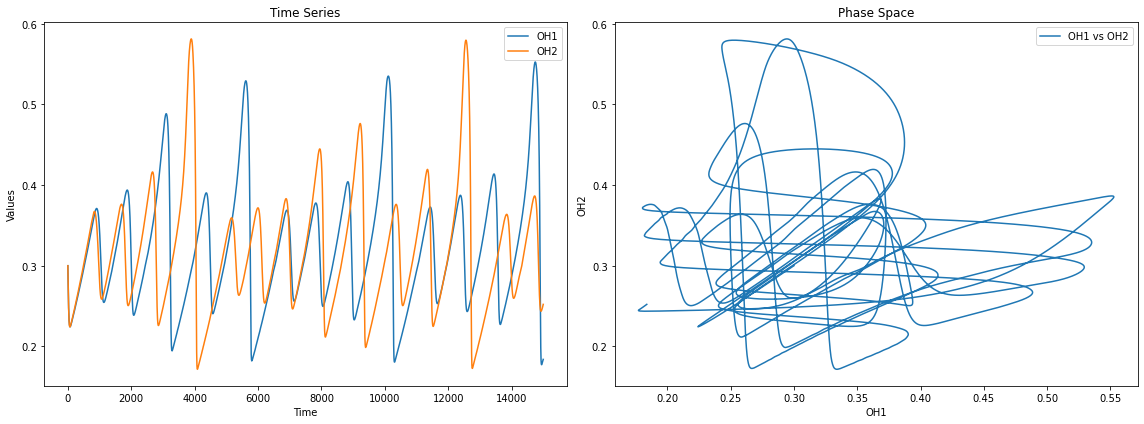

In [3]:
solve_plot(bi_coupling)

## Similiarity Function

In [4]:
# def simf(x1, x2, tau):
#     val = 
#     return

## Uni-Directional Coupling

In [ ]:
tau1, tau2, e = 0, 64, .02
def uni_coupling(t,x):
    dx = np.zeros(6)
    dx[0] = p * (1 - x[1] - x[2]) - q * x[0]
    dx[1] = x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1]) + r)*x[1] + 2 * s * x[2] * (1 - x[1] - x[2])
    dx[2] = r * x[1] - s * x[2] * (1 - x[1] - x[2])
    dx[3] = p * (1 - x[4] - x[5]) - q * x[3]
    dx[4] = x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4]) + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5]) + e * ((x[1])*(t-tau1) - (x[4])*(t-tau2))
    dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5])
    
    return np.array(dx)

solve_plot(uni_coupling)

/tmp/ipykernel_28324/1861318474.py:8: RuntimeWarning: overflow encountered in exp
  dx[4] = x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4]) + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5]) + e * ((x[1])*(t-tau1) - (x[4])*(t-tau2))
/tmp/ipykernel_28324/1861318474.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  dx[4] = x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4]) + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5]) + e * ((x[1])*(t-tau1) - (x[4])*(t-tau2))
/tmp/ipykernel_28324/1861318474.py:8: RuntimeWarning: overflow encountered in scalar multiply
  dx[4] = x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4]) + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5]) + e * ((x[1])*(t-tau1) - (x[4])*(t-tau2))
/tmp/ipykernel_28324/1861318474.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5])
/tmp/ipykernel_28324/1861318474.py:8: RuntimeWarning: invalid value encountered in scalar add
  dx[4] = x[3] * (1 - x[4] - x[5]) - (np

### Figure-1

### Figure-2

### Figure-3

### Figure-4

### Figure-5

### Figure-6

### Figure-7

### Figure-8

### Figure-9

### Figure-10

### Figure-11

### Figure-12

### Figure-13

### Figure-14

### Figure-15

### Figure-16

### Figure-17

### Figure-18